In [1]:
import pandas as pd
import numpy as np
import pickle
import cv2
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
img_path_561 = f'./output_step/561merge0.tif'
img_path_488 = f'./output_step/488merge0.tif'
img = cv2.imread(img_path_488,cv2.COLOR_BAYER_BG2RGB)

In [3]:
df_488=pd.read_csv('df_488.csv')
df_561=pd.read_csv('df_561.csv')
def pickle_all(key, value):
    pickle_out = open(key + ".pkl", "wb")
    pickle.dump(value, pickle_out)
    pickle_out.close()
df_488.drop(['Unnamed: 0'],axis=1,inplace=True)
df_561.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
import seaborn as sns

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def make_corr(Vs):
    cols = Vs.columns
    plt.figure(figsize=(15,15))
    sns.heatmap(Vs[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    #plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()

In [6]:
df_488.shape

(5000, 6)

In [7]:
df=pd.DataFrame()
for i in [1,300,500,1000,2000,3000,4000,4999]:
    df=pd.concat([df,df_561[df_561.index==i]],axis=0)

In [8]:
df1=pd.DataFrame()
for i in [1,300,500,1000,2000,3000,4000,4999]:
    df1=pd.concat([df1,df_488[df_488.index==i]],axis=0)
df1

,image_mean_488,image_num_488,image_std_488,image_max_488,image_min_488,image_thresholding_value_488
1,212.846031,[[ 20 28 6 ... 0 0 636]\n [ 0 0 0 ...,438.825431,19859,0,2336.761115
300,128.699482,[[ 0 19 0 ... 0 0 391]\n [ 0 18 0 ...,234.869838,8037,0,1265.469498
500,112.803062,[[ 26 36 0 ... 0 0 377]\n [ 0 0 0 ...,194.446258,5977,0,1053.922952
1000,93.731129,[[ 86 0 0 ... 0 0 464]\n [ 0 40 0 ...,147.341099,3969,0,806.862046
2000,79.075169,[[ 0 0 1 ... 0 0 414]\n [ 33 0 53 ...,113.957711,2370,0,630.630491
3000,73.752136,[[ 24 28 0 ... 0 0 357]\n [ 0 0 46 ...,101.851745,2051,0,566.714584
4000,68.928738,[[ 35 0 0 ... 0 0 343]\n [ 0 0 0 ...,92.096905,1570,0,514.677756
4999,66.879509,[[ 59 0 0 ... 0 0 328]\n [ 0 24 0 ...,87.383914,1368,0,489.817651


<AxesSubplot:>

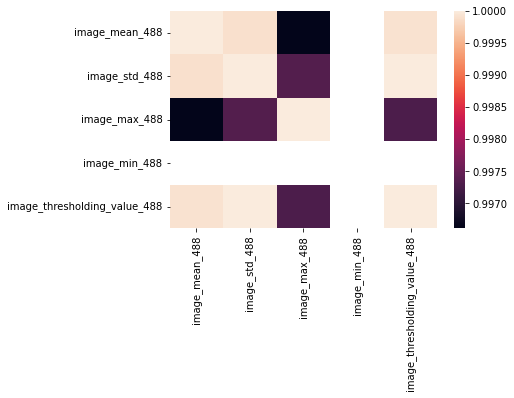

In [9]:
sns.heatmap(df1.corr())

In [10]:
def model_linear(df_488):    
    from sklearn.linear_model import LinearRegression
    
    
    from sklearn.model_selection import train_test_split
    X=df_488[['image_mean_488','image_std_488']]
    y=df_488.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
    model_488=LinearRegression()
    model_488.fit(X_train,y_train)
    from sklearn.metrics import  mean_squared_error
    y_pred=model_488.predict(X_test)
    print(mean_squared_error(y_test,y_pred))
    print(model_488.coef_)
    print(model_488.intercept_)
    
    return model_488,y_pred

In [11]:

model_488,pred_488=model_linear(df_488)

3.5972663123253345e-26
[1.   4.84]
0.0


In [14]:
def model_linear1(df_488):    
    from sklearn.linear_model import LinearRegression
    
    import random
    from sklearn.model_selection import train_test_split
    list=[]
    for i in range(10):
        a=random.randint(5,10)
        b=random.randint(25,45)
        random_=[random.randint(a,b) for c in range(500)]
        list.extend(random_)
    list_=[]
    for i in range(10):
        a=random.randint(5,10)
        b=random.randint(25,45)
        random_=[random.randint(a,b) for c in range(500)]
        list_.extend(random_)
    df_488['random']=list
    df_488['random_']=list_
    random_=[random.randint(-3,5) for i in range(5000)]
    
    
    df_488['image_thresholding_value_561']=df_488['image_thresholding_value_561'] #+df_488['random'] 
    df_488['image_mean_561']=df_488['image_mean_561'] #+df_488['random_']
     
    X=df_488[['image_mean_561','image_std_561','image_min_561','image_max_561']]
    
    y=df_488.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
    model_488=LinearRegression()
    model_488.fit(X_train,y_train)
    from sklearn.metrics import  mean_squared_error
    y_pred=model_488.predict(X_test)
    print('     mean_squared_error : {}'.format(mean_squared_error(y_test,y_pred)))
    print('     coef : {}'.format(model_488.coef_))
    print('     intercept : {}'.format(model_488.intercept_))
    #print(df_488.columns)
    pca1=PCA(n_components=1)
    df=pca1.fit_transform(df_488.loc[:,['image_mean_561', 'image_std_561', 'image_max_561',
       'image_min_561']])
    df=pd.DataFrame(df)
    
    sns.set(rc={'figure.figsize':(20,10)})
    df['image_thresholding_value_561']=df_488['image_thresholding_value_561']
    df.columns=['PCA (mean , std, min, max )','image_thresholding_value']
    
    df.loc[:1000,:].to_csv('one_dimension.csv')
    plot=sns.regplot(x='PCA (mean , std, min, max )', y='image_thresholding_value', data=df.loc[:1000,:]).set_title('Regression Model for Image Thresholding');
    
    fig = plot.get_figure()
    
    fig.savefig("out.png") 
    
    X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1:],test_size=0.2,random_state=10)
    model_488=LinearRegression()
    model_488.fit(X_train,y_train)
    print('     mean_squared_error : {}'.format(mean_squared_error(y_test,y_pred)))
    print('     coef : {}'.format(model_488.coef_))
    print('     intercept : {}'.format(model_488.intercept_))
    
    
    return '.'

     mean_squared_error : 85.28442286263933
     coef : [-1.81798158  0.38245879  0.          0.00697045]
     intercept : 46.65952705484948
     mean_squared_error : 607109.4845353725
     coef : [[0.14529823]]
     intercept : [781.1856923]


'.'

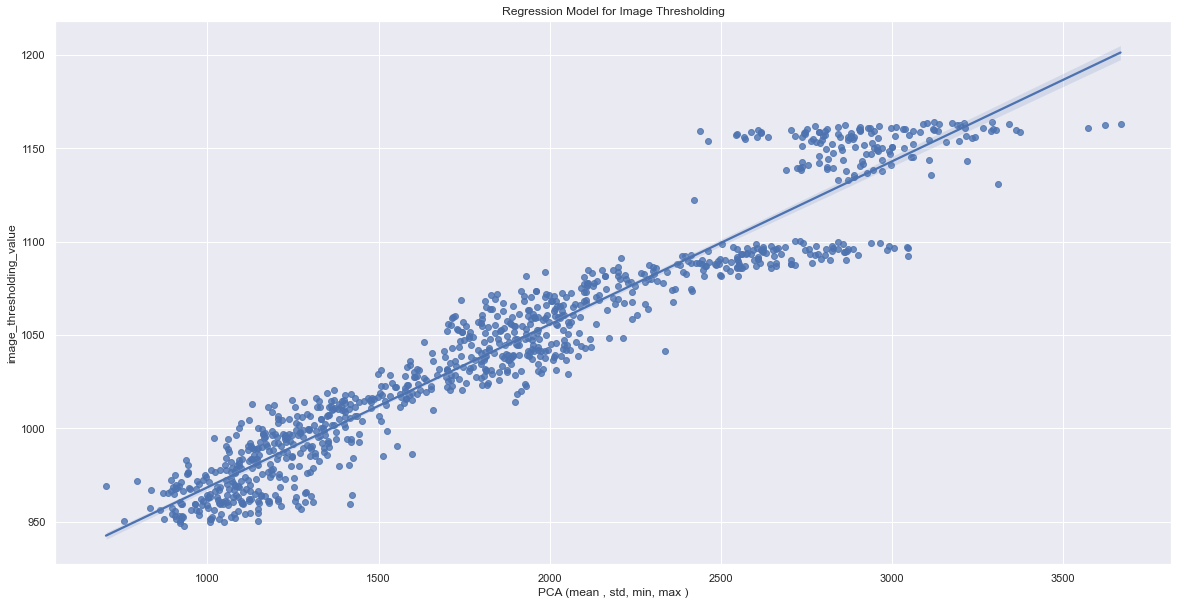

In [15]:
model_linear1(df_561)